In [3]:
import numpy as np
import sys
sys.path.append('..')
%matplotlib inline
from sarpy.visualization import mosaic

(60000, 28, 28)
(60000,)


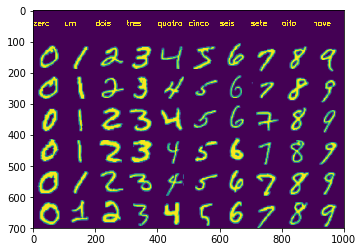

In [4]:
# TESTS
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape)

# Monta nome das labels
classes = np.arange(10)
names = ['zero', 'um', 'dois', 'tres', 'quatro', 'cinco', 'seis', 'sete', 'oito', 'nove']

# Números por extenso
class_names = [[cls, names[cls]] for cls in classes]
# Usar as próprias classes como nome
#class_names = [[cls, str(cls)] for cls in classes]

M = mosaic(train_images, train_labels, classes, class_names=class_names)

import matplotlib.pyplot as plt

# O matplotlib está invertendo as cores, deveria ser dígitos brancos sobre fundo preto
plt.imshow(M)
plt.show()

In [5]:
# animation using mp4 video, needs ffmpeg, nice but not collaboratory friendly 

from matplotlib import animation, rc
from IPython.display import HTML

M = mosaic(train_images, train_labels, classes, class_names=class_names)

def animate_visualization(mosaic, number_of_frames, has_labels=True):
    def plot_movie_mp4(image_array, interval=1000):
        dpi = 72.0
        xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
        fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
        im = plt.figimage(image_array[0])

        def animate(i):
            im.set_array(image_array[i])
            return (im,)

        anim = animation.FuncAnimation(fig, animate, frames=len(image_array), interval=interval)
        display(HTML(anim.to_html5_video()))
    
    width, height = int(len(mosaic)/number_of_frames), len(mosaic[0])
    if has_labels:
        plot_movie_mp4([mosaic.reshape(number_of_frames, width, height)[0]])
        plot_movie_mp4(mosaic.reshape(number_of_frames, width, height)[1:])
    else:
        plot_movie_mp4(mosaic.reshape(number_of_frames, width, height))

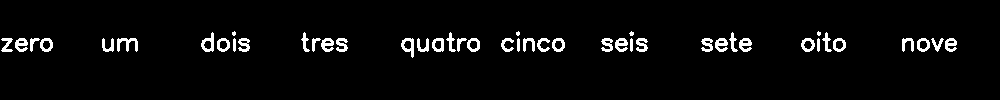

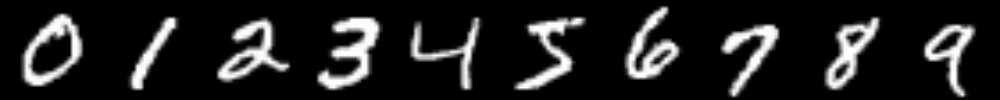

In [7]:
# animation using gif files video, needs ffmpeg, nice but not collaboratory friendly
import imageio
from IPython.display import Image

def animate_visualization(mosaic, number_of_frames, has_labels=True, duration=1):
    def create_gif(images_input, duration=1, output_file='data.gif'):
        images = []
        for i in images_input:
            images.append(i)
        imageio.mimsave(output_file, images, duration=duration)
    
    width, height = int(len(mosaic)/number_of_frames), len(mosaic[0])
    if has_labels:
        create_gif([mosaic.reshape(number_of_frames, width, height)[0]], duration, 'data1.gif')
        create_gif(mosaic.reshape(number_of_frames, width, height)[1:], duration, 'data2.gif')
        display(Image(filename="data1.gif"))
        display(Image(filename="data2.gif"))
    else:
        create_gif(mosaic.reshape(number_of_frames, width, height, duration, 'data.gif'))
        display(Image(filename="data.gif"))

animate_visualization(M, 7)
